In [403]:
import matplotlib.pyplot as plt

In [429]:
import mesa as ms
import pylab as p
import numpy as np


%matplotlib inline 
p.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session

data_path = "/Users/tassos/repos/CE_mesa/working/LOGS/"
a = ms.mesa(data_path=data_path, parallel=True, abundances=False, log_abundances = True, Yaxis='mass', Xaxis="log_inv_star_age",czones=False, Variable='v_div_vesc', orbit=True)

Process running in parallel on  8  cores
Process running in parallel on  8  cores


Process running in parallel on  8  cores


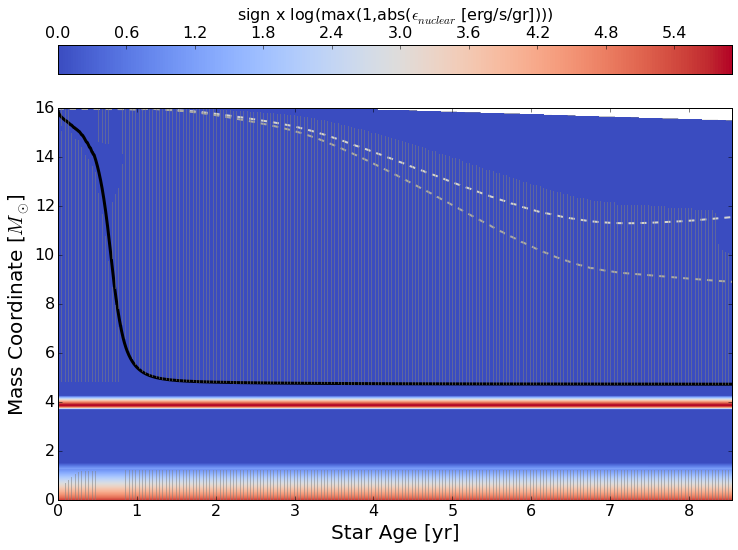

In [405]:
a.SetParameters(Variable='eps_nuc', cmap_dynamic_range=5, tau100=True, Yaxis='mass', Xaxis='star_age', czones=True)
a.Kippenhahn()

Process running in parallel on  8  cores


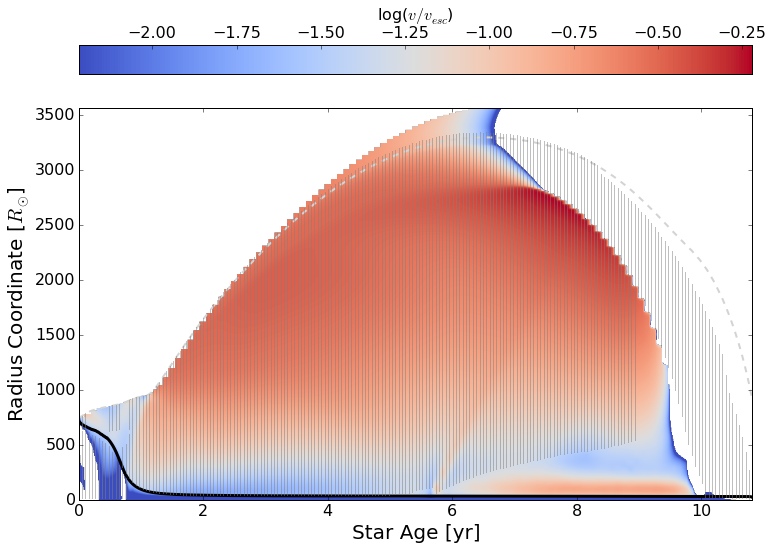

In [430]:
a.SetParameters(cmap_dynamic_range=2.0, signed_log_cmap=False,Yaxis='radius', Xaxis="star_age", czones=True, Variable='v_div_vesc')
a.Kippenhahn()

Process running in parallel on  8  cores


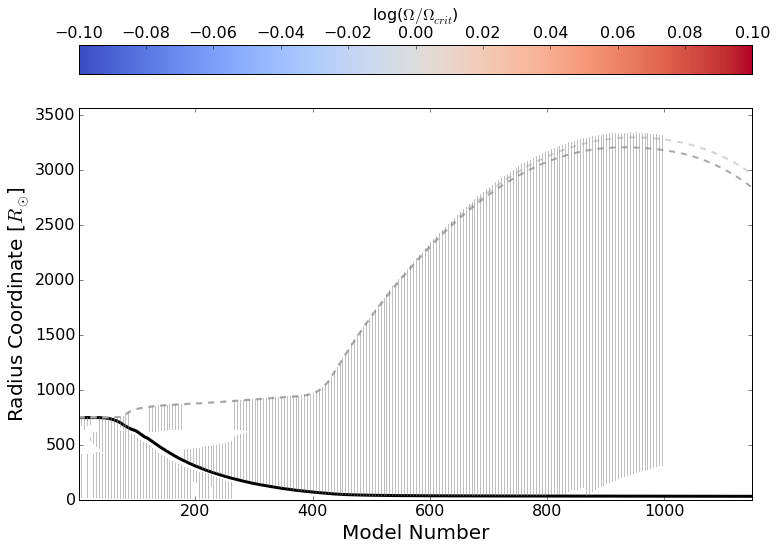

In [407]:
a.SetParameters(cmap_dynamic_range=3, signed_log_cmap=False,Yaxis='radius', Xaxis="model_number", czones=True, Variable='omega_div_omega_crit')
a.Kippenhahn()

Process running in parallel on  8  cores


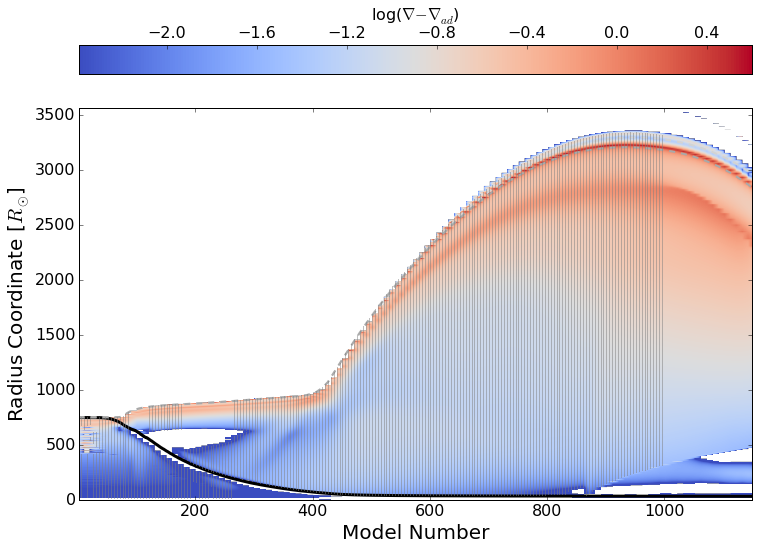

In [408]:
a.SetParameters(cmap_dynamic_range=3, signed_log_cmap=False,Yaxis='radius', Xaxis="model_number", czones=True, Variable='super_ad')
a.Kippenhahn()

Process running in parallel on  8  cores


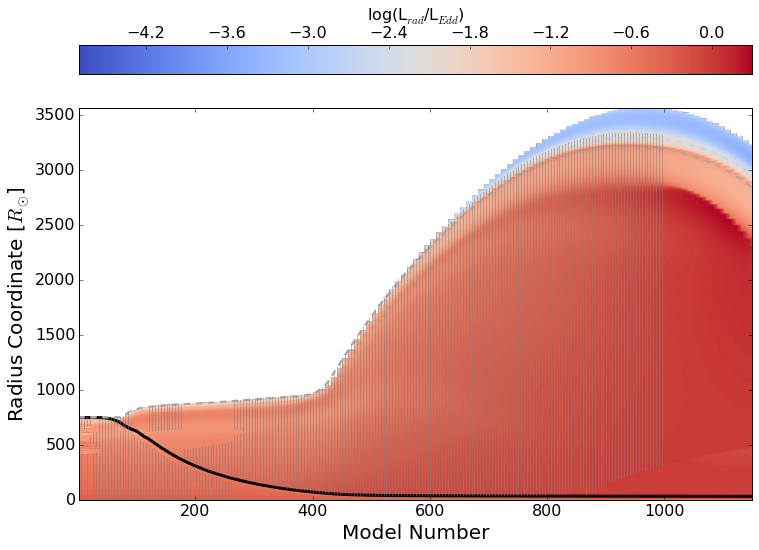

In [409]:
a.SetParameters(Variable='Lrad_div_Ledd', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  8  cores


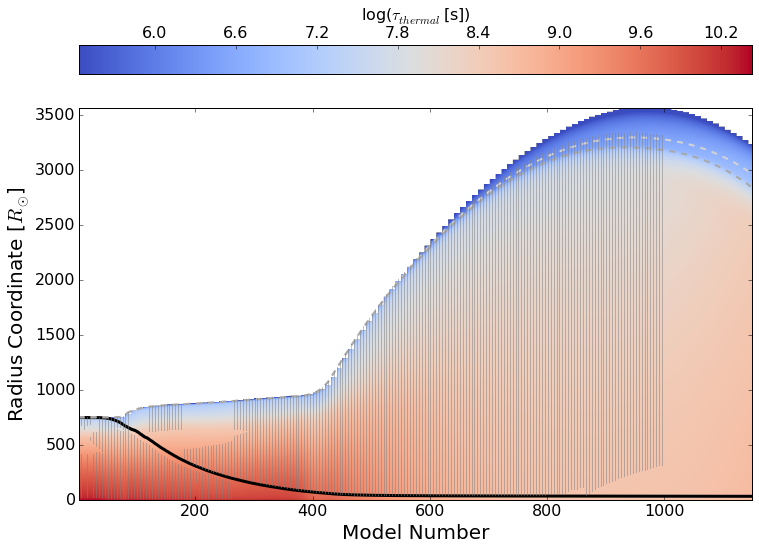

In [410]:
a.SetParameters(Yaxis="radius", Variable='t_thermal', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  8  cores


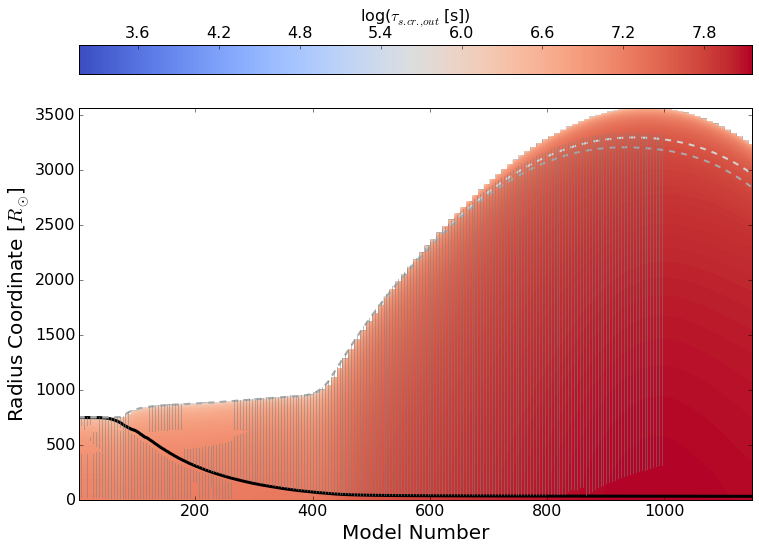

In [411]:
a.SetParameters(Yaxis="radius", Variable='t_dynamical', Xaxis="model_number", cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  8  cores


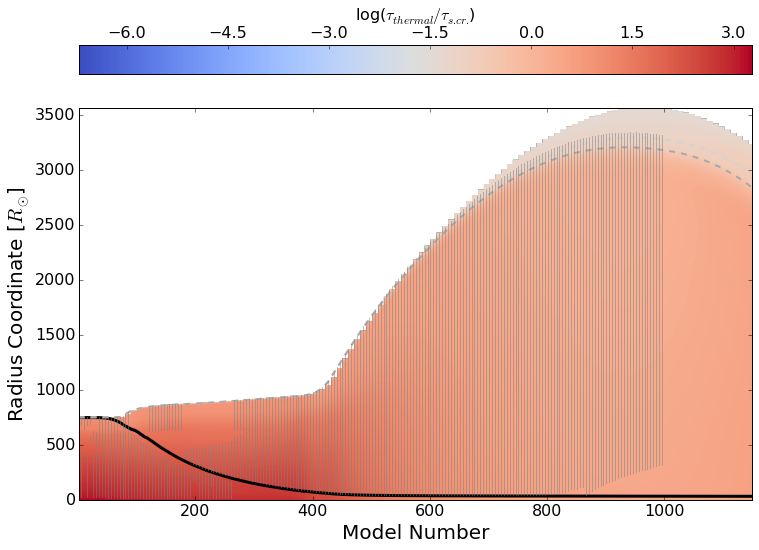

In [412]:
a.SetParameters(Yaxis="radius", Variable='t_thermal_div_t_dynamical', Xaxis="model_number", cmap_dynamic_range=10)
a.Kippenhahn()

Process running in parallel on  8  cores


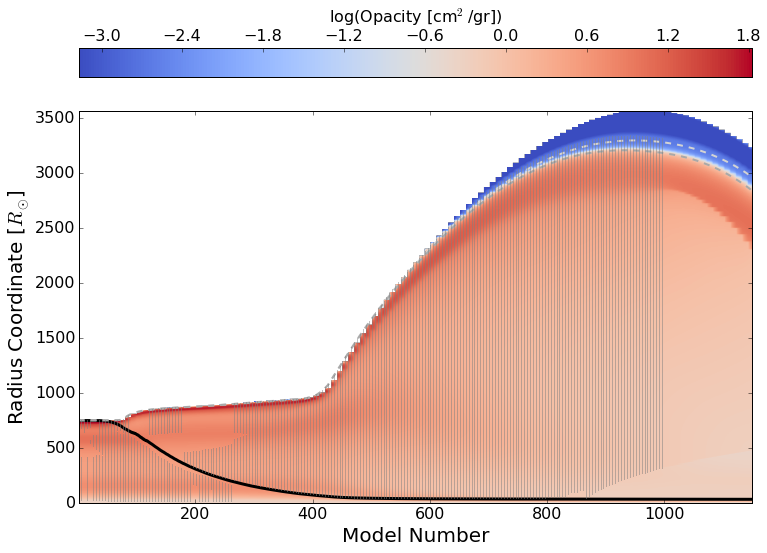

In [413]:
a.SetParameters(Yaxis="radius", Variable='opacity',Xaxis='model_number', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  8  cores


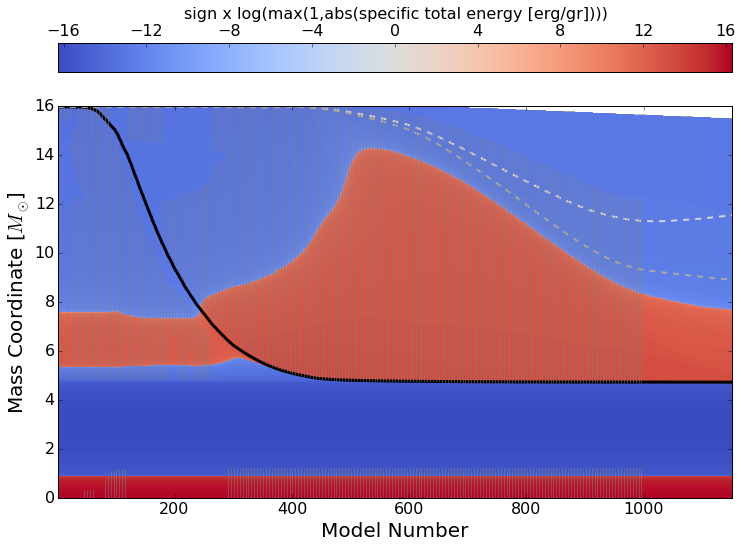

In [414]:
a.SetParameters(Variable='total_energy', Xaxis="model_number", Yaxis="mass", cmap_dynamic_range=5,signed_log_cmap=True, tau100=True)
a.Kippenhahn()

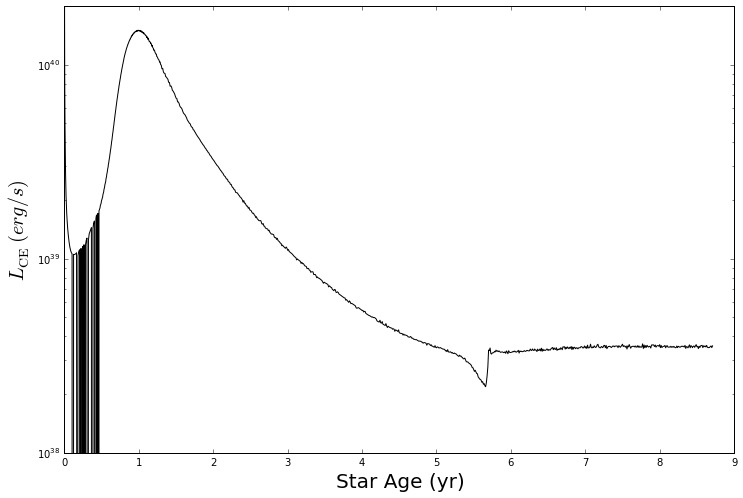

In [415]:
plt.plot(a.history['star_age'], a.history["CE_energy_rate"], color='k')
plt.xlabel('Star Age (yr)', size=20)
plt.ylabel(r'$L_{\rm CE}\ (erg/s)$', size=20)
plt.yscale('log')
plt.ylim(1.0e38, 2.0e40)
plt.show()

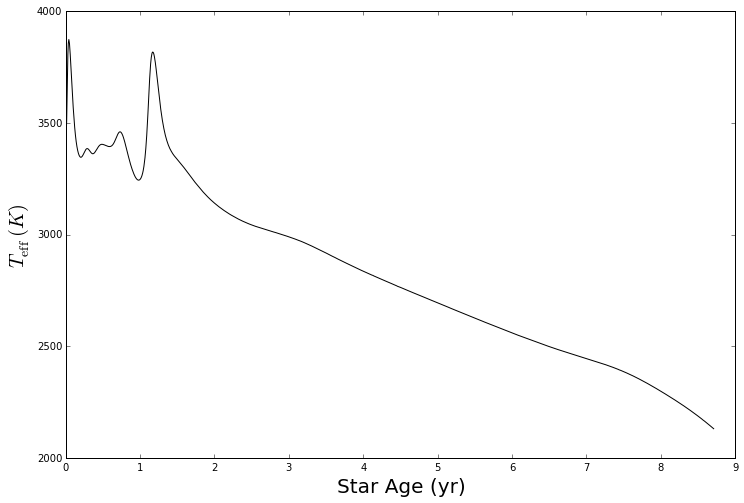

In [416]:
plt.plot(a.history['star_age'], 10**a.history["log_Teff"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r'$T_{\rm eff}\ (K)$', size=20)
plt.show()

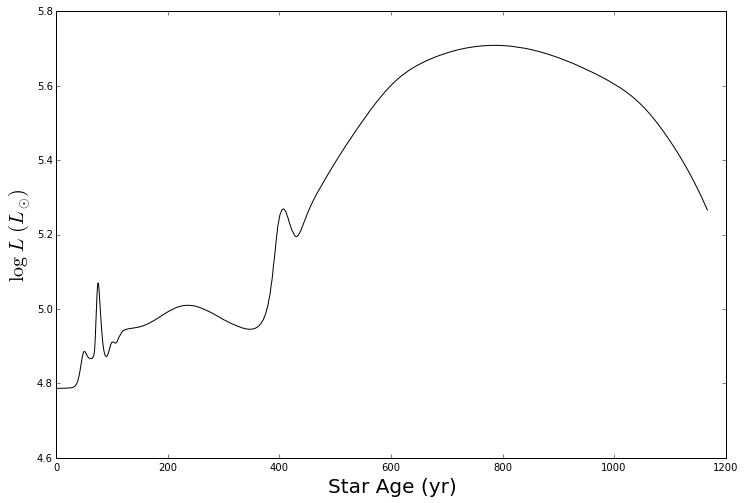

In [417]:
plt.plot(a.history['model_number'], a.history["log_L"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r"${\rm log}\ L\ (L_{\odot})$", size=20)
plt.show()

[ 4.78664352  4.83518144  4.88371936  4.93225728  4.9807952   5.02933311
  5.07787103  5.12640895  5.17494687  5.22348479  5.27202271  5.32056062
  5.36909854  5.41763646  5.46617438  5.5147123   5.56325022  5.61178814
  5.66032605  5.70886397]
[ 3.73799074  3.73847131  3.73895188  3.73943246  3.73991303  3.7403936
  3.74087418  3.74135475  3.74183532  3.7423159   3.74279647  3.74327704
  3.74375762  3.74423819  3.74471876  3.74519934  3.74567991  3.74616048
  3.74664106  3.74712163]


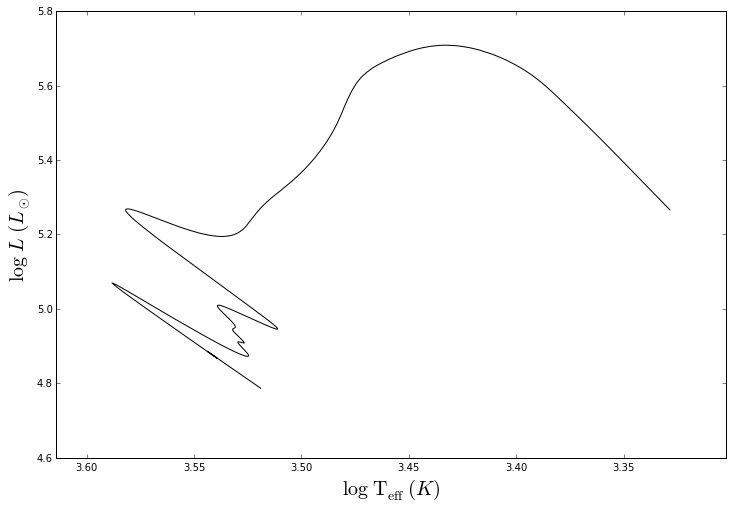

In [418]:
plt.plot(a.history['log_Teff'], a.history["log_L"], color='k')
xwidth = max(a.history['log_Teff']) - min(a.history['log_Teff'])
plt.xlim(0.1*xwidth + max(a.history['log_Teff']), -0.1*xwidth + min(a.history['log_Teff']))
plt.xlabel(r"${\rm log}\ {\rm T}_{\rm eff}\ (K)$", size=20)
plt.ylabel(r"${\rm log}\ L\ (L_{\odot})$", size=20)
aa=1
bb=4
MM =16.
AA = 1./101.
BB = 7./51.
CC = 13./51.
DD = np.log10(4000)
logL_hayashi = np.linspace(np.min(a.history["log_L"]), np.max(a.history["log_L"]), num=20)
logTeff_hayashi = AA*logL_hayashi + BB* np.log10(MM) + CC*np.log10(0.5) + DD
print logL_hayashi
print logTeff_hayashi
plt.plot(logTeff_hayashi, logL_hayashi, color='g')
plt.show()

4.0829157057e+49


/Users/tassos/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


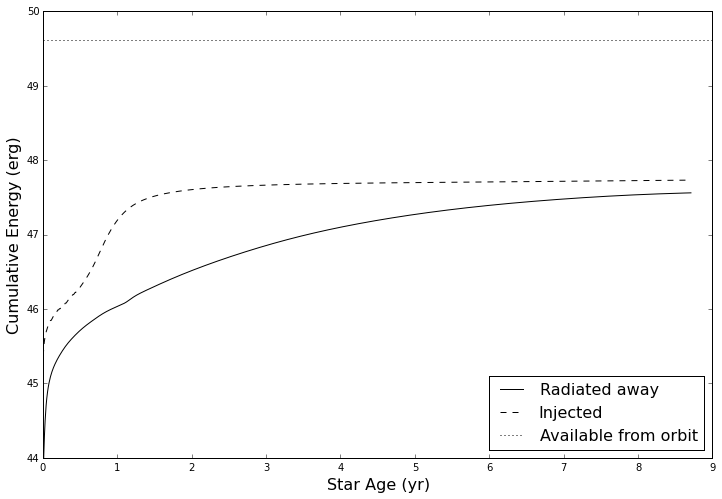

In [419]:
secyer = 31622400.0

lum = 10.0**a.history['log_L']
time_step = 10.0**a.history['log_dt'] * secyer
time = a.history["star_age"]

E_rad = np.cumsum(lum*time_step)
plt.plot(time, np.log10(E_rad * 3.839e33), color='k', label="Radiated away")


E_CE = np.cumsum(time_step*a.history["CE_energy_rate"])
plt.plot(time, np.log10(E_CE), color='k', linestyle='dashed', label="Injected")

Msun = 1.988e33
G = 6.6725e-8
Rsun = 6.957e10
E_available = G*a.history['he_core_mass'][-1]*Msun*Msun/(0.34*Rsun)
print E_available


plt.axhline(np.log10(E_available), color='k', linestyle='dotted', label="Available from orbit")
#plt.text("")

plt.xlabel('Star Age (yr)', size=16)
plt.ylabel('Cumulative Energy (erg)', size=16)

plt.ylim(44, 50)


plt.legend(loc=4, fontsize=16)

plt.show()

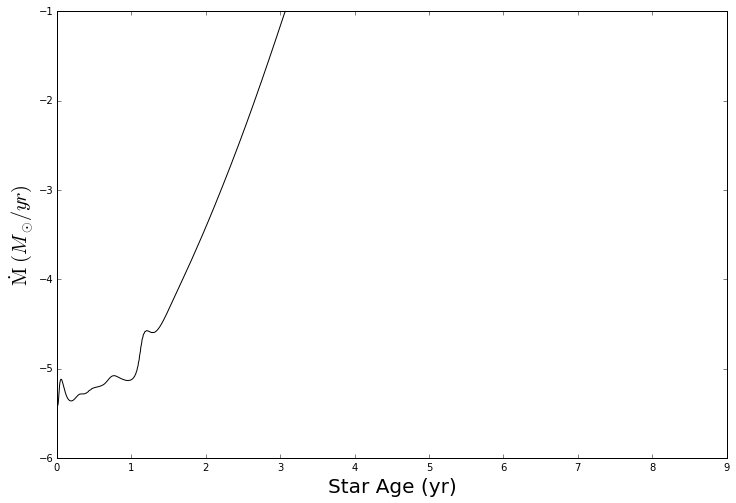

In [420]:
plt.plot(a.history['star_age'], a.history["log_abs_mdot"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r"${\rm \dot{M}}\ (M_{\odot}/yr)$", size=20)
plt.show()

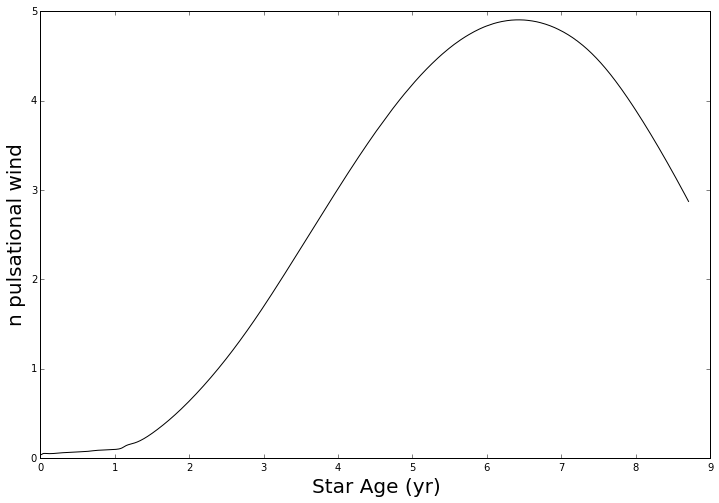

In [421]:
plt.plot(a.history["star_age"], np.log10(a.history['eta_pulse_wind']), color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r"n pulsational wind ", size=20)
plt.show()

Process running in parallel on  8  cores


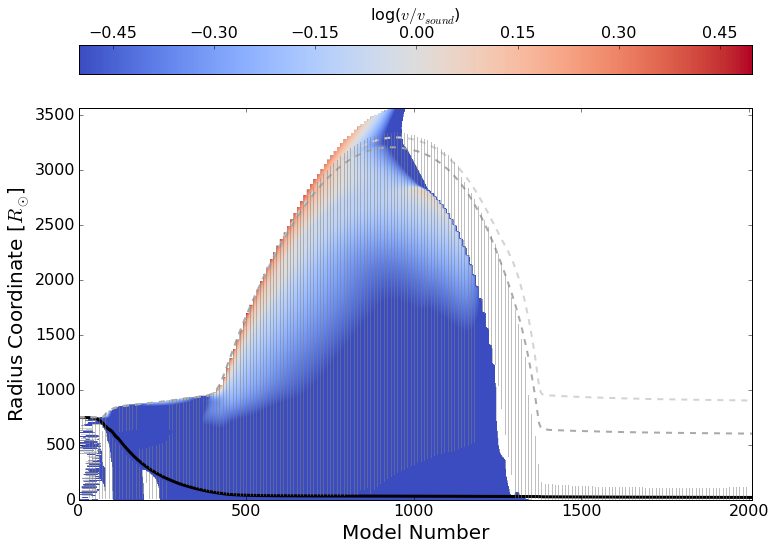

In [431]:
a.SetParameters(Yaxis="radius", Xaxis='model_number',Variable='v_div_csound', tau10=True, tau100=True, cmap_dynamic_range=1,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  8  cores


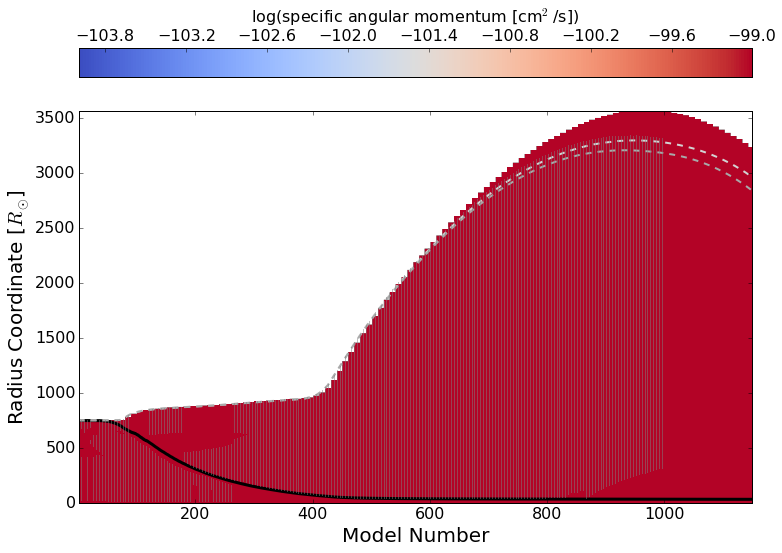

In [423]:
a.SetParameters(Yaxis="radius", Variable='j_rot', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  8  cores


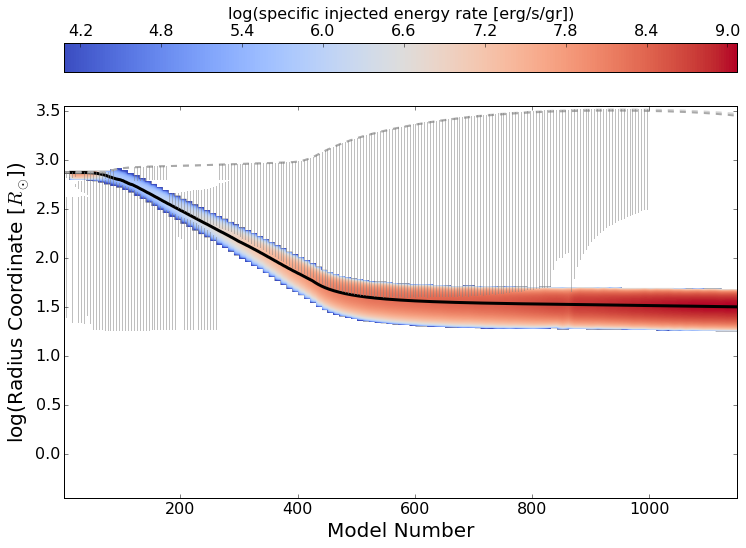

In [424]:

a.SetParameters(Yaxis="log_radius", Variable='extra_heat', Xaxis='model_number', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  8  cores


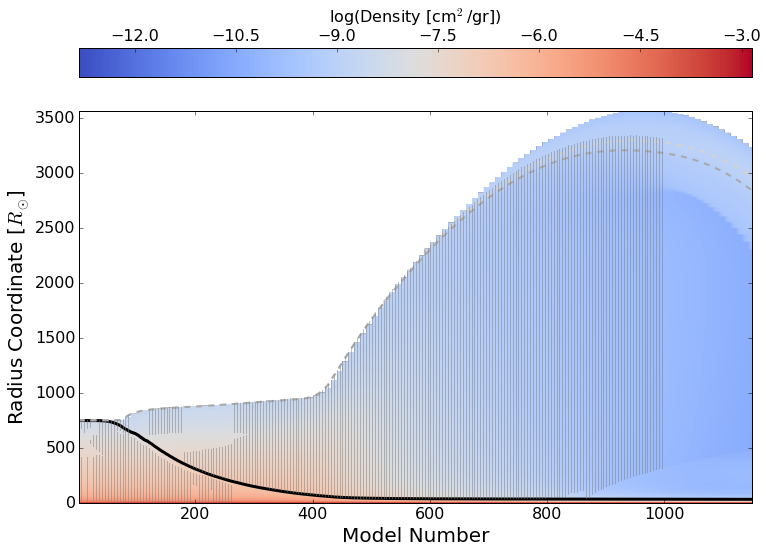

In [425]:
a.SetParameters(Yaxis="radius", Variable='density', cmap_dynamic_range=10,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  8  cores


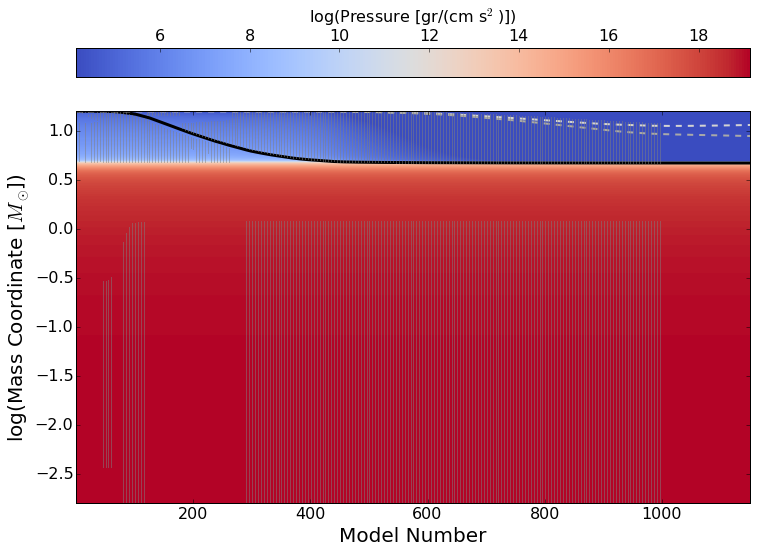

In [426]:
a.SetParameters(Yaxis="log_mass", Variable='pressure', cmap_dynamic_range=15,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  8  cores


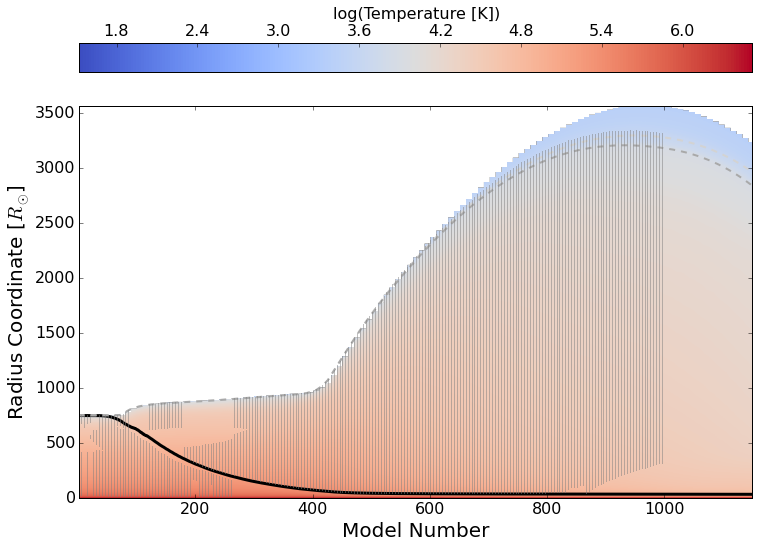

In [427]:
a.SetParameters(Yaxis="radius", Variable='temperature', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()